## Impute missing data using Seasonal decomposition and interpolation

#### If data has a strong seasonal component we can extract that seasonal component and use that to impute the missing data

#### We can use any methods for extracting seasonal component 
* #### Classical decomposition
* #### STL
* #### MSTL (extract multiple seasonality)

#### STEPS
* STL can't handle missing data so a linear interpolation is performed before before decomposing a time series
* STL assumes time-series is additive

* Extract the seasonal component
    * `stl = STL(df['y'].interpolate(method='linear'), seasonal=7)`
    * `season = stl.seasonal`
* Substract the seasonal component from the time-series
    * `de_season = df['y'] - season`
* Linear interpolate the missing
    * `inputed_series = de_season.interpolate(method='linear')`
* Add back the seasonality
    * `inputer_series = inputed_season + season`



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import STL

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series


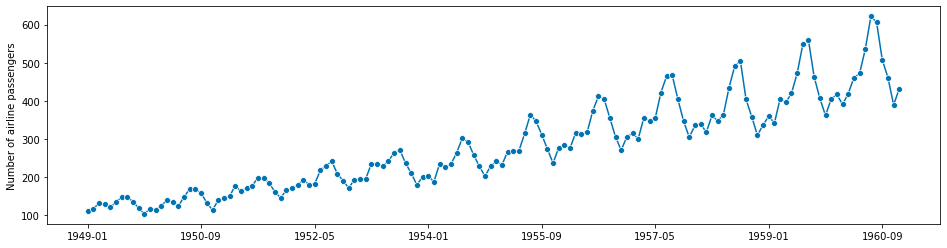

In [23]:
y = load_airline()
plot_series(y);

## Create missing data

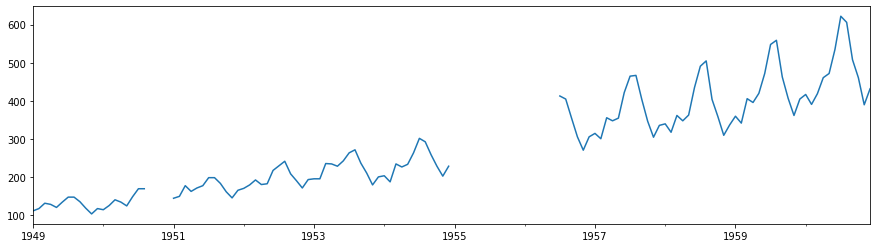

In [24]:
temp = y.copy()
# small-gap of missing data
temp[y.loc['1950-09':'1950-12'].index]=np.nan
# large-gap of missing data
temp[y.loc['1955-01':'1956-06'].index]=np.nan

# Index column must be numeric or datetime 
temp.index = temp.index.to_timestamp()
temp.plot(figsize=(15,4));

## Seasonal decomposition and interpolation 

#### STL can't handle missing so impute using linear interpolation before decomposing the time series

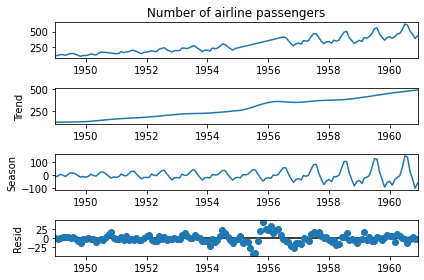

In [25]:
stl = STL(endog=temp.interpolate(method='linear'), period=12, seasonal=7).fit()
season = stl.seasonal

stl.plot();

### Substract the seasonal component from timeseries

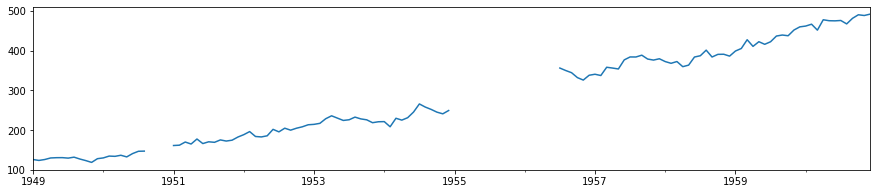

In [26]:
de_season = temp - season

de_season.plot(figsize=(15,3));

### Impute the missing using linear interpolation

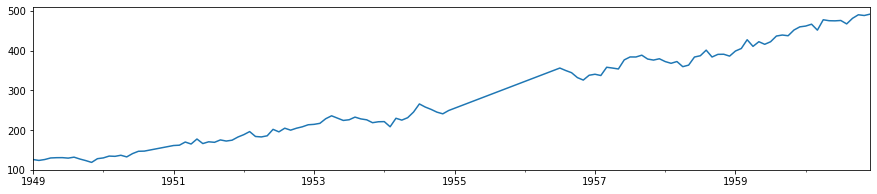

In [27]:
de_season = de_season.interpolate(method='linear')
de_season.plot(figsize=(15,3));

### Add back the seasonal component

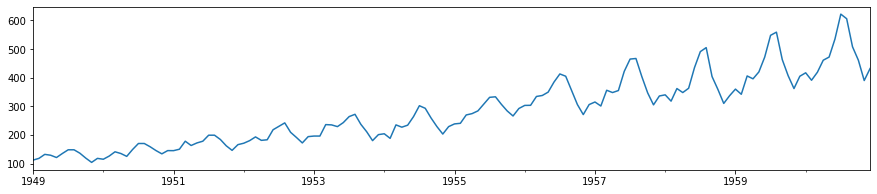

In [28]:
imputed_series = de_season + season
imputed_series.plot(figsize=(15,3));

## Compare original and imputed

<AxesSubplot:>

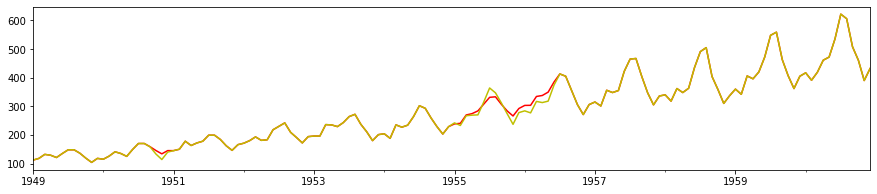

In [45]:
plt.figure(figsize=(15,3),alpha=0.5)
imputed_series.plot(figsize=(15,3) , c='r');
y.plot(c='y')